# Assignment 1 - Intro to Python

### Medium complexity - Birthday Paradox

Birthday paradox concerns the probability that, in a set of `n` randomly chosen people, some pair of them will have the same birthday. You can read about this problem at https://en.wikipedia.org/wiki/Birthday_problem.

Write a function called **`has_duplicates()`**, that takes a list and returns `True` if there is any element that appears more than once. It should not modify the original list.

If there are 45 students in the class, what are the chances that any two students will have the same birthday? You can estimate this probability by generating random samples of 45 birthdays and checking for matches.

**Hints:**
1. you can generate random birthdays with the `randint` function in the `random` module. 
2. For simplicity, use the day number of the year, not the actual date
3. you can use the book solution as a starting point for this assignment: https://github.com/AllenDowney/ThinkPython2/blob/master/code/birthday.py or http://greenteapress.com/thinkpython2/code/birthday.py

The code should print out: 
- number of students
- number of iterations/samples
- list of duplicate days for each iteration, where duplicates are found
- probability


### Defining a class below called bdays
#### Defining two attributes:
* Itself
* List of the birthdays


####*Defining 4 methods: 
One counting number of students and the other one return if there is duplicate 

*  number (): Counting number of students
* list_of_repeats(): Return dictionary of repeats and their indices as keys
* has_duplicates(): Return yes or no and the dictionary of duplicates
* has_3_duplicates: Return yes or no and the dictionary of triplicates

In [0]:
class bdays: #Define a class called bdays
  def __init__(self,list_bdays): #define itself
    self.list_bdays=list_bdays

  def number(self): #define the first method 
    self.number=len(self.list_bdays) #Calculates the number of birthdays in the list
  
  def list_of_repeats (self): #Define the second method list of repeats. 
    #Return a list of repeats in a form of dictionary with the keys being the birthday
    #And the values being the postiion of the repeats
    list_repeats={};
    for x in self.list_bdays: #Looping through all the element in the list to find all the repeat in birthdays
      if (self.list_bdays).count(x)>1 and x not in list(list_repeats.keys()):
        list_repeats[x]=[];
        c=0; #Intiate a counter to find the next occurance of the repeat
        while c<(len(self.list_bdays)-1) and x in self.list_bdays[c+1:]: #Propogate the dictionary
          if (self.list_bdays).index(x)==0:            
            list_repeats[x]=[(self.list_bdays).index(x)];
          d=(self.list_bdays).index(x,c+1,len(self.list_bdays));
          (list_repeats[x]).append(d);
          c=d;
    return list_repeats
  
  def has_duplicates(self): #Define the third method which checks the list_of_repeats output if there are duplciates if so what are they
    list_repeats=self.list_of_repeats();
    duplicate_only={};
    for x in list_repeats:
      if len(list_repeats[x])==2:
        duplicate_only[x]=list_repeats[x]; 
    if duplicate_only!={}:
      return True, duplicate_only
    else:
      return False ,[]
      

  def has_3_duplicates(self): #Define the fourth method which checks the list_of_repeats output if there are triplicates if so what are they
    list_repeats=self.list_of_repeats();
    triplicate_only={};
    for x in list_repeats:
      if len(list_repeats[x])==3:
        triplicate_only[x]=list_repeats[x]; 
    if triplicate_only!={}:
      return True, triplicate_only
    else:
      return False,[]



### Now we have defined the class, it's time to define the script that utilizes the class bdays. We will create a function with input :
* On how many random classes we are producting (number of iterations)
* number of students

### The function will output:
* list of duplicate days for each iteration, where duplicates are found
* Probability of having a duplicate birthdays in a class


In [0]:
def prob_bdays(num_class,num_student): #Define a function to calculate probabiliy and the list of duplicates
  import random
  duplicates=[];
  counter=0;
  for i in range(0,num_class): #Iterate through all number of classes/iterations
    bdays_list=[];
    for b in range (0,num_student): #Iterate throough each student to randomly create its birtdahy 
      bday=random.randint(1,365);
      bdays_list.append(bday);
    class_1=bdays(bdays_list);
    answer,list_bday=class_1.has_duplicates(); #Utilize the class created to have whether there is duplicate and output list if duplicates
    if answer==True: #If true count this class as having a match
      counter=counter+1;
      duplicates.append([i+1,list_bday])
  Prob=counter/num_class; #Number of matches divided by the number of classes surveyed
  return Prob,duplicates

### Creating a while loop to determine the minimum iteration number to result in the analytical solution

In [0]:
Previous=1000; #Intiate some parameters for the for-loop
Diff=1;
num_class=1;
while Diff>=0.0001: #Exist for loop if subsequent probabilty calculation has a diff less than 0.0001
  Prob,duplicates=prob_bdays(num_class,45);
  Diff=abs(Previous-Prob)
  Previous=Prob; #Update Previous to the current prob
  num_class=num_class+10;# Stepping iteration of 10 
print(num_class) #Print number of classes
print(Prob) #Print the probability 
duplicates[0] #Printing out duplicate of the first occurrence to show list of duplicates

21
1.0


[1, {33: [14, 41]}]

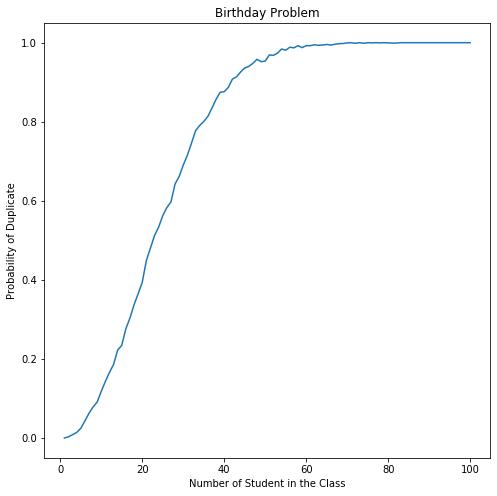

In [0]:
#Creating a plot of num_class vs probability
#Creating a list of incemental number of students 
num_student=list(range(1,101,1));
prob_list=[];
for b in num_student:
  Prob,duplicate=prob_bdays(2000,b);
  prob_list.append(Prob) # going for 1000 iterations
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8),facecolor='w')
plt.plot(num_student,prob_list)
plt.xlabel('Number of Student in the Class')
plt.ylabel('Probability of Duplicate')
plt.title ('Birthday Problem')
plt.show()